# Import Libraries

In [22]:
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix
import matplotlib.pyplot as plt

# Importing DataSet

In [6]:
fraud=pd.read_csv('Fraud_check (1).csv')
fraud.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


# Data Understanding

In [7]:
fraud.shape

(600, 6)

In [8]:
fraud.describe()

,Taxable.Income,City.Population,Work.Experience
count,600.000000,600.000000,600.000000
mean,55208.375000,108747.368333,15.558333
std,26204.827597,49850.075134,8.842147
min,10003.000000,25779.000000,0.000000
25%,32871.500000,66966.750000,8.000000
50%,55074.500000,106493.500000,15.000000
75%,78611.750000,150114.250000,24.000000
max,99619.000000,199778.000000,30.000000


In [9]:
fraud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [10]:
fraud.dtypes

Undergrad          object
Marital.Status     object
Taxable.Income      int64
City.Population     int64
Work.Experience     int64
Urban              object
dtype: object

# Data Visualization

<AxesSubplot:xlabel='Undergrad', ylabel='Taxable.Income'>

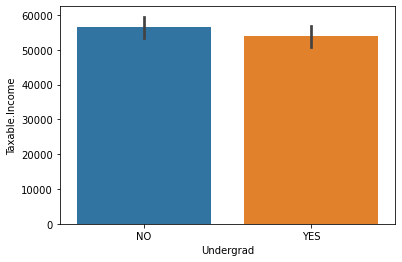

In [16]:
sns.barplot(x=fraud.Undergrad,y=fraud['Taxable.Income'])

<AxesSubplot:xlabel='Urban', ylabel='Taxable.Income'>

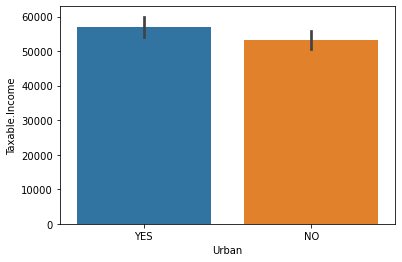

In [17]:
sns.barplot(x=fraud.Urban,y=fraud['Taxable.Income'])

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='City.Population', ylabel='Taxable.Income'>

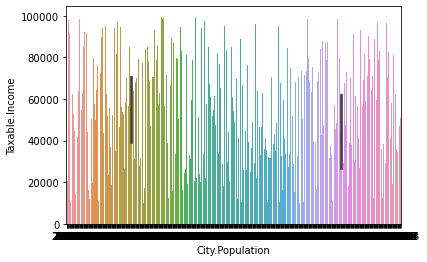

In [33]:
sns.barplot(fraud['City.Population'],fraud['Taxable.Income'])

<AxesSubplot:xlabel='Work.Experience', ylabel='Taxable.Income'>

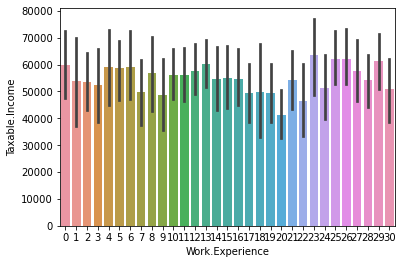

In [20]:
sns.barplot(x=fraud['Work.Experience'],y=fraud['Taxable.Income'])

In [12]:
fraud["income"]="<=30000"
fraud.loc[fraud["Taxable.Income"]>=30000,"income"]="Good"
fraud.loc[fraud["Taxable.Income"]<=30000,"income"]="Risky"

In [8]:
fraud.drop(["Taxable.Income"],axis=1,inplace=True)

In [9]:
fraud.rename(columns={"Undergrad":"undergrad","Marital.Status":"MaritalStatus","City.Population":"population","Work.Experience":"experience","Urban":"urban"},inplace=True)

In [10]:
le=LabelEncoder()

In [11]:
fraud['undergrad']=le.fit_transform(fraud.undergrad)
fraud['MaritalStatus']=le.fit_transform(fraud.MaritalStatus)
fraud['urban']=le.fit_transform(fraud.urban)

In [12]:
x=fraud.drop(['income'],axis=1)
y=fraud.income

In [13]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,stratify = y,random_state=7)

In [22]:
rfe=RandomForestClassifier(n_estimators=100,criterion='gini',max_depth=5)

In [23]:
rfe.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=5, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [24]:
y_train_pred=rfe.predict(x_train)

In [25]:
y_test_pred=rfe.predict(x_test)

In [26]:
print(accuracy_score(y_train,y_train_pred))

0.8


In [27]:
print(accuracy_score(y_test,y_test_pred))

0.7916666666666666


In [28]:
print(confusion_matrix(y_train,y_train_pred))

[[381   0]
 [ 96   3]]


In [29]:
print(confusion_matrix(y_test,y_test_pred))

[[95  0]
 [25  0]]
